In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.patches as patches

In [ ]:
df1 = pd.read_csv("file1.csv")
df2 = pd.read_csv("file2.csv")

In [ ]:
df1.isnull().sum()

Area_Name                                                       0
Year                                                            0
Group_Name                                                      0
Sub_Group_Name                                                  0
Cases_Acquitted_or_Discharged                                   0
Cases_charge_sheets_were_not_laid_but_Final_Report_submitted    0
Cases_Chargesheeted                                             0
Cases_Compounded_or_Withdrawn                                   0
Cases_Convicted                                                 0
Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law    0
Cases_Investigated_Chargesheets+FR_Submitted                    0
Cases_not_Investigated_or_in_which_investigation_was_refused    0
Cases_Pending_Investigation_at_Year_End                         0
Cases_Pending_Investigation_from_previous_year                  0
Cases_Pending_Trial_at_Year_End                                 0
Cases_Pend

In [ ]:
k1 = list(df1)
k2 = list(df2)
k = [x for x in k1 if x in k2]
k

['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name']

Analysing the difference between the columns Group_Name and Sub_Group_Name

In [ ]:
print(df1["Group_Name"].unique())
print(df1["Sub_Group_Name"].unique())

['Rape' 'Kidnapping & Abduction - Women & Girls' 'Dowry Deaths'
 'Molestation' 'Sexual harassment' 'Cruelty by Husband and Relatives'
 'Importation of Girls' 'Immoral Traffic (Prevention) Act'
 'Indecent Representation of Women (Prohibition) Act'
 'Sati Prevention Act' 'Total Crime Against Women']
['01. Rape' '02. Kidnapping & Abduction of Women & Girls'
 '03. Dowry Deaths' '04. Molestation' '05. Sexual Harassment'
 '06. Cruelty by Husband and Relatives' '07. Importation of Girls'
 '08. Immoral Traffic Prevention Act' '09. Dowry Prohibition Act'
 '10. Indecent Representation of Women(Prohibition) Act'
 '11. Sati Prevention Act' '12. Total Crimes Against Women']


In [ ]:
df1 = df1.drop(["Group_Name"], axis=1)
df2 = df2.drop(["Group_Name"], axis=1)

In [ ]:
df2 = df2.replace(to_replace="09. Dowry Prohibition", value="09. Dowry Prohibition Act")

Merging the 2 files

In [ ]:
k1 = list(df1)
k2 = list(df2)
k = [x for x in k1 if x in k2]
k

['Area_Name', 'Year', 'Sub_Group_Name']

In [ ]:
df = pd.merge(df1, df2, on=k)


In [ ]:
df.to_csv('Crime_Against_Women.csv')

In [ ]:
df.shape

(2765, 33)

In [ ]:
total_df = df[df['Sub_Group_Name']=='12. Total Crimes Against Women']
#total_df.groupby(['Area_Name','Year']).first()
total_df

,Area_Name,Year,Sub_Group_Name,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,Cases_Investigated_Chargesheets+FR_Submitted,...,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial
3850,Andaman & Nicobar Islands,2001,12. Total Crimes Against Women,14,6,40,0,0,0,46,...,34,49,0,33,18,204,0,16,171,220
3851,Andhra Pradesh,2001,12. Total Crimes Against Women,6773,236,13848,1849,4765,2067,14084,...,22218,19991,4142,5485,6862,29935,850,15104,27636,47627
3852,Arunachal Pradesh,2001,12. Total Crimes Against Women,12,22,138,7,36,0,160,...,218,169,40,70,70,854,49,55,749,918
3853,Assam,2001,12. Total Crimes Against Women,1289,1031,2115,154,302,322,3146,...,5497,3120,410,3930,4700,10002,1607,2269,9385,12505
3854,Bihar,2001,12. Total Crimes Against Women,1760,627,4307,196,768,401,4934,...,13034,10975,1495,5878,6319,39450,1618,6547,35633,46608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160,Tamil Nadu,2010,12. Total Crimes Against Women,2823,565,4780,13,1749,708,5345,...,9649,8841,2809,3407,4038,21259,177,8392,20814,29655
4161,Tripura,2010,12. Total Crimes Against Women,683,102,1360,74,95,15,1462,...,2127,1611,144,408,584,2183,340,1467,2193,3804
4162,Uttar Pradesh,2010,12. Total Crimes Against Women,6976,3746,14401,366,10307,1704,18147,...,58330,41235,27706,6897,7934,116367,16058,48532,125133,166368
4163,Uttarakhand,2010,12. Total Crimes Against Women,308,185,864,17,499,47,1049,...,1750,1683,1075,241,231,5764,77,2127,6286,7969


In [ ]:
df = df[df['Sub_Group_Name']!='12. Total Crimes Against Women']
df["Sub_Group_Name"].unique()

array(['01. Rape', '02. Kidnapping & Abduction of Women & Girls',
       '03. Dowry Deaths', '04. Molestation', '05. Sexual Harassment',
       '06. Cruelty by Husband and Relatives', '07. Importation of Girls'],
      dtype=object)

In [ ]:
zero= dict()
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    zero[column_name] = ((count/df.shape[0])*100).round(3)
zero

{'Area_Name': 0.0,
 'Year': 0.0,
 'Sub_Group_Name': 0.0,
 'Cases_Acquitted_or_Discharged': 28.204,
 'Cases_charge_sheets_were_not_laid_but_Final_Report_submitted': 35.469,
 'Cases_Chargesheeted': 22.408,
 'Cases_Compounded_or_Withdrawn': 56.367,
 'Cases_Convicted': 33.551,
 'Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law': 48.408,
 'Cases_Investigated_Chargesheets+FR_Submitted': 20.898,
 'Cases_not_Investigated_or_in_which_investigation_was_refused': 85.837,
 'Cases_Pending_Investigation_at_Year_End': 23.102,
 'Cases_Pending_Investigation_from_previous_year': 23.878,
 'Cases_Pending_Trial_at_Year_End': 17.959,
 'Cases_Pending_Trial_from_the_previous_year': 18.49,
 'Cases_Reported': 20.408,
 'Cases_Sent_for_Trial': 22.408,
 'Cases_Trials_Completed': 25.184,
 'Cases_Withdrawn_by_the_Govt': 97.551,
 'Cases_withdrawn_by_the_Govt_during_investigation': 96.898,
 'Total_Cases_for_Trial': 16.286,
 'Persons_Acquitted': 27.959,
 'Persons_against_whom_cases_Compounded_or_Withdrawn':

## Exploratory Data Analysis

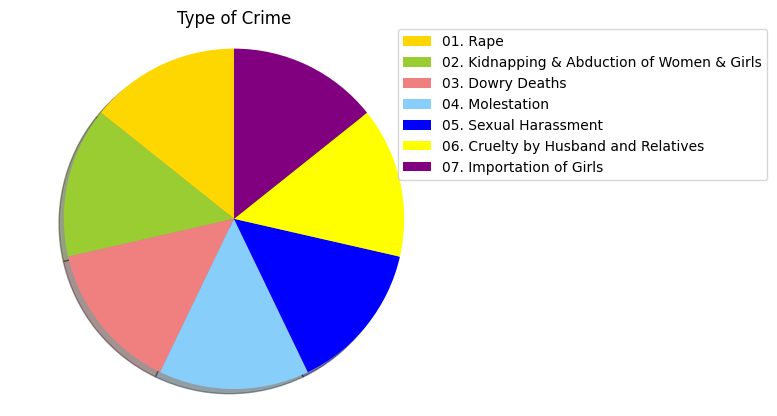

In [ ]:
# Data to plot
labels = df["Sub_Group_Name"].unique()
sizes = df['Sub_Group_Name'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','blue','yellow','purple', 'red','pink','grey','orange','darkblue']

plt.title('Type of Crime')

patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels,   bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.subplots_adjust(left=0.05, bottom=0.1, right=0.75)
plt.axis('equal')
plt.show()

No bias in data. All type of Crime are equally represented for the respective States.

['01. Rape' '02. Kidnapping & Abduction of Women & Girls'
 '03. Dowry Deaths' '04. Molestation' '05. Sexual Harassment'
 '06. Cruelty by Husband and Relatives' '07. Importation of Girls']
                                             Cases_Acquitted_or_Discharged  \
Sub_Group_Name                                                               
01. Rape                                                            100941   
02. Kidnapping & Abduction of Women & Girls                          58648   
03. Dowry Deaths                                                     37249   
04. Molestation                                                     143444   
05. Sexual Harassment                                                34353   
06. Cruelty by Husband and Relatives                                244110   
07. Importation of Girls                                               234   

                                             Cases_Convicted  
Sub_Group_Name                                

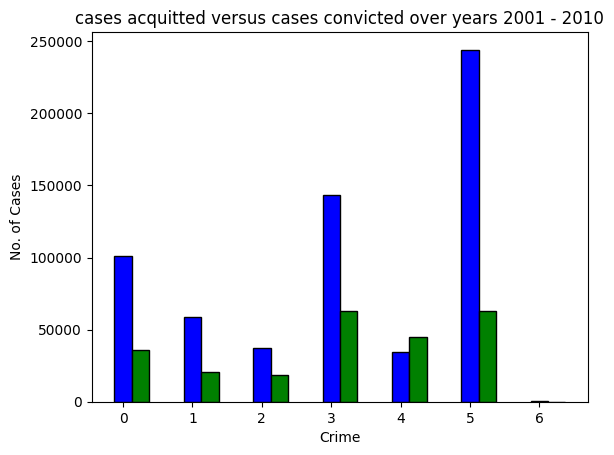

In [ ]:
#Bar graph for cases acquitted versus cases convicted over years 2001 - 2010
xlabels = df["Sub_Group_Name"].unique()
print(df["Sub_Group_Name"].unique())

x1=df.groupby(["Sub_Group_Name"]).agg({'Cases_Acquitted_or_Discharged':'sum','Cases_Convicted':'sum'})
print(x1.head(50))
n=len(df["Sub_Group_Name"].unique())
r = np.arange(n)
width = 0.25
plt.bar(r,x1['Cases_Acquitted_or_Discharged'],color = 'b',width = width, edgecolor = 'black')
plt.bar(r + width, x1['Cases_Convicted'], color = 'g',width = width, edgecolor = 'black')
plt.xlabel("Crime")
plt.ylabel("No. of Cases")
plt.title("cases acquitted versus cases convicted over years 2001 - 2010")
plt.show()


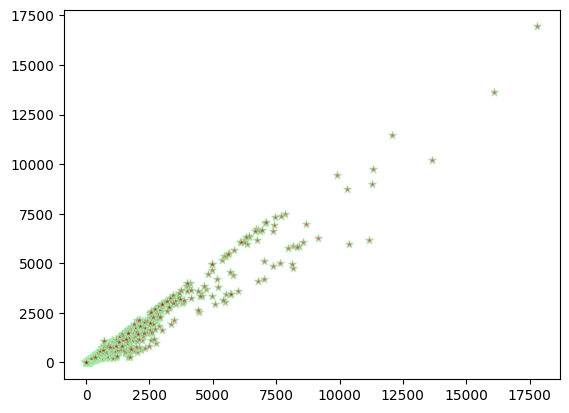

In [ ]:
plt.scatter(df['Cases_Reported'], df['Cases_Sent_for_Trial'],
            color = '#A90303', marker = '*',alpha = 0.6,
             edgecolors = '#A4F5AF')



### FINDING CORRELATION

In [ ]:
#describe() funtion gives us the summary statistics of the dataframe
df.describe()

,Year,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,Cases_Investigated_Chargesheets+FR_Submitted,Cases_not_Investigated_or_in_which_investigation_was_refused,Cases_Pending_Investigation_at_Year_End,...,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial
count,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,...,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000,2450.000000
mean,2005.500000,252.644490,40.437143,527.591020,54.545306,100.617551,61.798367,568.028163,1.062041,221.587347,...,1081.744898,1008.696735,189.949388,231.892653,246.659592,3904.586531,58.281224,710.398367,3704.294694,4712.991429
std,2.872868,534.023365,127.779987,1215.994292,242.164162,266.706351,247.936275,1273.335949,4.965482,586.690003,...,2894.465173,2706.244943,625.592904,656.112955,697.563330,12499.543852,322.523761,1774.146864,11799.857039,14295.219791
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,4.000000,7.000000
50%,2005.500000,17.000000,4.000000,45.000000,0.000000,8.000000,1.000000,53.500000,0.000000,21.000000,...,76.000000,64.500000,11.000000,13.000000,14.000000,243.500000,0.000000,51.000000,221.500000,314.000000
75%,2008.000000,286.000000,24.000000,507.750000,8.000000,75.000000,25.000000,581.750000,0.000000,150.750000,...,943.000000,871.750000,129.000000,140.000000,147.750000,2717.250000,16.000000,666.000000,2597.000000,3554.750000
max,2010.000000,5343.000000,1816.000000,16946.000000,3400.000000,3024.000000,4755.000000,17407.000000,68.000000,8934.000000,...,31807.000000,28238.000000,11741.000000,7616.000000,7616.000000,180583.000000,7365.000000,22171.000000,173115.000000,200934.000000


In [ ]:
#correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
#plt.savefig('result.png')

<ipython-input-23-30d05387b048>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Year,Cases_Acquitted_or_Discharged,Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,Cases_Chargesheeted,Cases_Compounded_or_Withdrawn,Cases_Convicted,Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,Cases_Investigated_Chargesheets+FR_Submitted,Cases_not_Investigated_or_in_which_investigation_was_refused,Cases_Pending_Investigation_at_Year_End,Cases_Pending_Investigation_from_previous_year,Cases_Pending_Trial_at_Year_End,Cases_Pending_Trial_from_the_previous_year,Cases_Reported,Cases_Sent_for_Trial,Cases_Trials_Completed,Cases_Withdrawn_by_the_Govt,Cases_withdrawn_by_the_Govt_during_investigation,Total_Cases_for_Trial,Persons_Acquitted,Persons_against_whom_cases_Compounded_or_Withdrawn,Persons_Arrested,Persons_Chargesheeted,Persons_Convicted,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_beginning,Persons_in_Custody_or_on_Bail_during_Investigation_at_Year_end,Persons_in_Custody_or_on_Bail_during_Trial_at_Year_End,Persons_Released_or_Freed_by_Police_or_Magistrate_before_Trial_for_want_of_evidence_or_any_other_reason,Persons_Trial_Completed,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial
Year,1.000000,0.051175,0.065387,0.063883,0.013517,0.018565,0.037017,0.067567,-0.052211,0.119919,0.113152,0.064432,0.061149,0.073535,0.063883,0.045156,-0.002844,0.007697,0.062826,0.044959,0.021470,0.052100,0.047841,0.034348,0.076741,0.076513,0.047734,0.056766,0.047085,0.047433,0.048210
Cases_Acquitted_or_Discharged,0.051175,1.000000,0.365965,0.907581,0.674491,0.543130,0.425656,0.903435,0.211061,0.530440,0.549789,0.832655,0.847275,0.886647,0.907581,0.949666,0.031573,0.067327,0.874901,0.925491,0.728593,0.880285,0.896258,0.489603,0.671222,0.671735,0.801467,0.292315,0.892579,0.803447,0.832870
Cases_charge_sheets_were_not_laid_but_Final_Report_submitted,0.065387,0.365965,1.000000,0.406792,0.191582,0.472752,0.306675,0.488824,0.156291,0.477436,0.485151,0.292972,0.291106,0.502715,0.406792,0.449765,0.002184,0.135211,0.319618,0.388108,0.294330,0.536021,0.466379,0.652536,0.510677,0.527663,0.297406,0.794802,0.532003,0.298492,0.334678
Cases_Chargesheeted,0.063883,0.907581,0.406792,1.000000,0.702284,0.618188,0.454488,0.995789,0.174109,0.614974,0.626288,0.894387,0.886829,0.979532,1.000000,0.908630,0.031259,0.071187,0.925765,0.838302,0.742083,0.881364,0.896084,0.550037,0.715242,0.697667,0.763909,0.336929,0.846065,0.757186,0.794651
Cases_Compounded_or_Withdrawn,0.013517,0.674491,0.191582,0.702284,1.000000,0.520899,0.389797,0.689883,0.082295,0.268957,0.295132,0.500393,0.518136,0.677760,0.702284,0.698207,0.033750,0.087857,0.564489,0.540488,0.928256,0.587815,0.607461,0.424827,0.370560,0.360061,0.421208,0.153275,0.570245,0.425481,0.466209
Cases_Convicted,0.018565,0.543130,0.472752,0.618188,0.520899,1.000000,0.395323,0.637790,0.040669,0.168441,0.183856,0.404708,0.423573,0.631964,0.618188,0.778823,0.042951,0.045894,0.470268,0.441919,0.534484,0.580229,0.559565,0.883729,0.260428,0.266322,0.352376,0.465786,0.655385,0.362407,0.405077
Cases_Declared_False_on_Account_of_Mistake_of_Fact_or_of_Law,0.037017,0.425656,0.306675,0.454488,0.389797,0.395323,1.000000,0.464796,0.153311,0.249003,0.265055,0.286856,0.284758,0.587047,0.454488,0.465468,0.010206,0.045150,0.323960,0.364473,0.431090,0.409985,0.410075,0.385779,0.276927,0.277315,0.255920,0.202075,0.419555,0.255397,0.288446
Cases_Investigated_Chargesheets+FR_Submitted,0.067567,0.903435,0.488824,0.995789,0.689883,0.637790,0.464796,1.000000,0.181952,0.635192,0.646770,0.883510,0.876105,0.985869,0.995789,0.912846,0.030070,0.081550,0.916149,0.839498,0.738201,0.895464,0.902532,0.590750,0.734279,0.719201,0.759353,0.401515,0.861351,0.753041,0.792451
Cases_not_Investigated_or_in_which_investigation_was_refused,-0.052211,0.211061,0.156291,0.174109,0.082295,0.040669,0.153311,0.181952,1.000000,0.246104,0.248418,0.103376,0.097996,0.200871,0.174109,0.172842,0.004778,0.308728,0.115029,0.174960,0.084204,0.153061,0.153229,0.025716,0.190679,0.184880,0.079602,0.075947,0.145169,0.073988,0.090081
Ca

In [ ]:
strong_corr = df.corr().round(6).unstack()
strong_corr = strong_corr[abs(strong_corr) >= 0.9]
strong_corr = strong_corr.sort_values(ascending=False)
strong_df= strong_corr.to_frame().reset_index()
strong_df

<ipython-input-24-9fb8721d1628>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  strong_corr = df.corr().round(6).unstack()


,level_0,level_1,0
0,Year,Year,1.000000
1,Total_Cases_for_Trial,Total_Cases_for_Trial,1.000000
2,Cases_Pending_Investigation_from_previous_year,Cases_Pending_Investigation_from_previous_year,1.000000
3,Cases_Pending_Trial_at_Year_End,Cases_Pending_Trial_at_Year_End,1.000000
4,Cases_Pending_Trial_from_the_previous_year,Cases_Pending_Trial_from_the_previous_year,1.000000
...,...,...,...
120,Cases_Investigated_Chargesheets+FR_Submitted,Persons_Chargesheeted,0.902532
121,Total_Persons_under_Trial,Cases_Pending_Trial_at_Year_End,0.901606
122,Cases_Pending_Trial_at_Year_End,Total_Persons_under_Trial,0.901606
123,Cases_Pending_Trial_at_Year_End,Persons_in_Custody_or_on_Bail_during_Trial_at_...,0.901250


In [ ]:
strong_df = strong_df[strong_df.level_0!=strong_df.level_1]
m = pd.DataFrame(np.sort(strong_df[['level_0','level_1']], axis=1), index=strong_df.index).duplicated()
strong_df = strong_df[~m]
strong_df = strong_df.reset_index(drop=True)
strong_df

,level_0,level_1,0
0,Cases_Sent_for_Trial,Cases_Chargesheeted,1.000000
1,Persons_under_Trial_at_Year_beginning,Persons_in_Custody_or_on_Bail_during_Trial_at_...,0.999126
2,Cases_Pending_Trial_at_Year_End,Cases_Pending_Trial_from_the_previous_year,0.997452
3,Persons_under_Trial_at_Year_beginning,Total_Persons_under_Trial,0.996749
4,Persons_in_Custody_or_on_Bail_during_Trial_at_...,Total_Persons_under_Trial,0.996742
5,Cases_Chargesheeted,Cases_Investigated_Chargesheets+FR_Submitted,0.995789
6,Cases_Investigated_Chargesheets+FR_Submitted,Cases_Sent_for_Trial,0.995789
7,Total_Cases_for_Trial,Cases_Pending_Trial_from_the_previous_year,0.995713
8,Total_Cases_for_Trial,Cases_Pending_Trial_at_Year_End,0.995146
9,Persons_Chargesheeted,Persons_Arrested,0.993084


<Axes: xlabel='Total_Cases_for_Trial'>

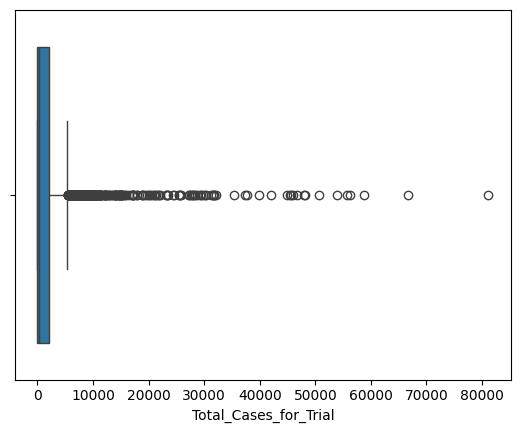

In [ ]:
#Outlier Analysis
sns.boxplot(x=df['Total_Cases_for_Trial'])

Since the total cases for trial are outliers, we have to drop those set of rows which are a cumulation of all the cases for trial.

In [ ]:
def find_outliers(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    IQR = q3 - q1
    ll = q1 - (1.5 * IQR)
    ul = q3 + (1.5 * IQR)
    upper_outliers = col[col > ul].index.tolist()
    lower_outliers = col[col < ll].index.tolist()
    bad_indices = list(set(upper_outliers + lower_outliers))
    return bad_indices

In [ ]:
bad_indexes = []
for col in df1.columns:
    if df1[col].dtype in ['int64', 'float64']:
        bad_indexes.extend(find_outliers(df1[col]))

In [ ]:
bad_indexes = set(bad_indexes)

# Display the DataFrame with outliers
df_with_outliers = df1.copy()
#df_with_outliers.loc[bad_indexes, :] = np.nan
print(bad_indexes)

{1, 3, 4, 6, 9, 11, 12, 15, 16, 17, 19, 20, 25, 28, 30, 32, 34, 36, 38, 39, 41, 44, 47, 50, 51, 52, 54, 55, 56, 60, 63, 65, 67, 69, 71, 73, 74, 76, 79, 82, 85, 86, 87, 89, 90, 95, 96, 97, 98, 100, 102, 104, 106, 108, 109, 111, 114, 120, 121, 122, 124, 125, 130, 132, 133, 135, 137, 139, 141, 143, 144, 146, 149, 151, 152, 155, 156, 157, 159, 160, 165, 167, 168, 170, 172, 174, 176, 178, 179, 181, 184, 186, 187, 190, 191, 192, 194, 195, 200, 202, 203, 205, 207, 209, 211, 213, 214, 216, 219, 221, 222, 225, 226, 227, 229, 230, 235, 238, 240, 242, 244, 246, 248, 249, 251, 254, 256, 257, 259, 260, 261, 262, 264, 265, 267, 270, 272, 273, 275, 277, 279, 281, 283, 284, 286, 289, 291, 292, 294, 295, 296, 297, 299, 300, 302, 305, 307, 308, 310, 312, 314, 316, 318, 319, 321, 324, 326, 327, 329, 330, 331, 332, 334, 335, 337, 340, 342, 343, 345, 347, 349, 351, 353, 354, 356, 359, 361, 362, 363, 364, 365, 366, 367, 369, 370, 371, 375, 376, 377, 378, 380, 382, 384, 386, 388, 389, 391, 394, 396, 397, 398

In [ ]:
df_cleaned = df_with_outliers.drop(index=bad_indexes)
print(df_cleaned)

                      Area_Name  Year                  Sub_Group_Name  \
0     Andaman & Nicobar Islands  2001                        01. Rape   
2             Arunachal Pradesh  2001                        01. Rape   
5                    Chandigarh  2001                        01. Rape   
7          Dadra & Nagar Haveli  2001                        01. Rape   
8                   Daman & Diu  2001                        01. Rape   
...                         ...   ...                             ...   
4138                Daman & Diu  2010  12. Total Crimes Against Women   
4140                        Goa  2010  12. Total Crimes Against Women   
4148                Lakshadweep  2010  12. Total Crimes Against Women   
4154                   Nagaland  2010  12. Total Crimes Against Women   
4159                     Sikkim  2010  12. Total Crimes Against Women   

      Cases_Acquitted_or_Discharged  \
0                                 5   
2                                 1   
5     

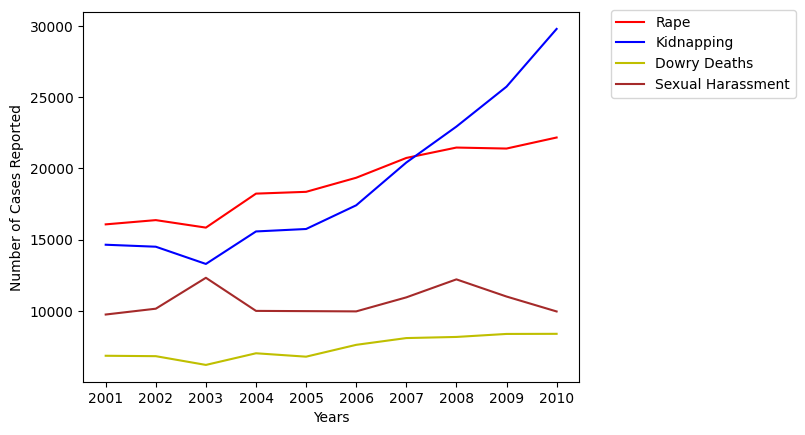

In [ ]:
x=df.groupby(["Sub_Group_Name","Year"]).agg({'Cases_Reported':'sum'}).reset_index()
xlbs = list(df["Year"].unique())
#print(xlbs)

xgraph=x.loc[x['Sub_Group_Name'] == "01. Rape"]
xgraph2=x.loc[x['Sub_Group_Name'] == "02. Kidnapping & Abduction of Women & Girls"]
xgraph3=x.loc[x['Sub_Group_Name'] == "03. Dowry Deaths"]
xgraph4=x.loc[x['Sub_Group_Name'] == "04. Molestation"]
xgraph5=x.loc[x['Sub_Group_Name'] == "05. Sexual Harassment"]
xgraph6=x.loc[x['Sub_Group_Name'] == "06. Cruelty by Husband and Relatives"]
xgraph7=x.loc[x['Sub_Group_Name'] == "07. Importation of Girls"]

crimes = df["Sub_Group_Name"].unique()
#print(xgraph["Cases_Reported"])
r=np.arange(10)
plt.plot(r, xgraph["Cases_Reported"], color='r')
plt.plot(r, xgraph2["Cases_Reported"], color='b')
plt.plot(r, xgraph3["Cases_Reported"], color='y')
plt.plot(r, xgraph5["Cases_Reported"], color='brown')

plt.xlabel("Years")
plt.ylabel("Number of Cases Reported")
plt.gca().legend(('Rape','Kidnapping','Dowry Deaths','Sexual Harassment','Cruelty'),bbox_to_anchor=(1.05,1.025), loc="upper left")
plt.xticks(np.arange(10), xlbs)

plt.show()

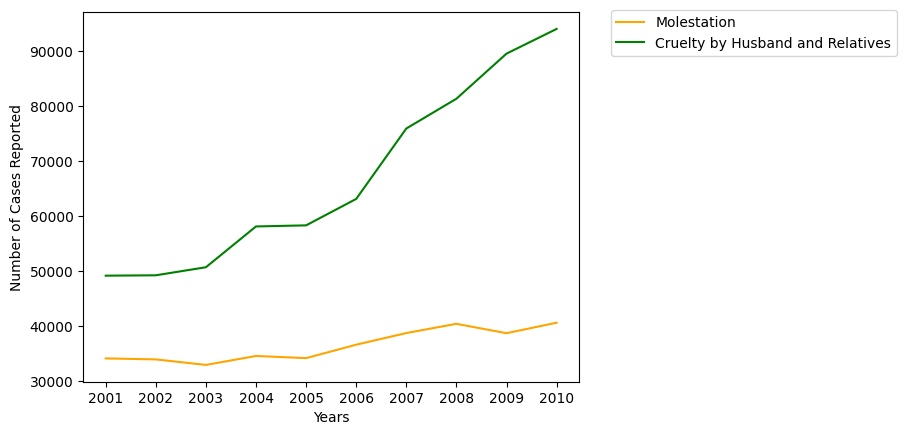

In [ ]:
plt.plot(r, xgraph4["Cases_Reported"], color='orange')
plt.plot(r, xgraph6["Cases_Reported"], color='green')
plt.xticks(np.arange(10), xlbs)
plt.gca().legend(('Molestation','Cruelty by Husband and Relatives'),bbox_to_anchor=(1.05,1.025), loc="upper left")
plt.xlabel("Years")
plt.ylabel("Number of Cases Reported")
plt.show()

In [ ]:
crime = list(df["Sub_Group_Name"].unique())[0:]
crime

['01. Rape',
 '02. Kidnapping & Abduction of Women & Girls',
 '03. Dowry Deaths',
 '04. Molestation',
 '05. Sexual Harassment',
 '06. Cruelty by Husband and Relatives',
 '07. Importation of Girls']

In [ ]:
g= pd.DataFrame(df.groupby(['Sub_Group_Name'])['Cases_Reported'].sum().reset_index())
g = g.sort_values("Cases_Reported",ascending = False)
g

,Sub_Group_Name,Cases_Reported
5,06. Cruelty by Husband and Relatives,669539
3,04. Molestation,364836
1,02. Kidnapping & Abduction of Women & Girls,190080
0,01. Rape,190008
4,05. Sexual Harassment,106311
2,03. Dowry Deaths,74351
6,07. Importation of Girls,753


In [ ]:
fig= px.bar(g,x=df['Sub_Group_Name'],y=df['Cases_Reported'],color_discrete_sequence=['blue'])
fig.show()

In [ ]:
g= pd.DataFrame(df.groupby(['Year'])['Cases_Reported'].sum().reset_index())
g = g.sort_values("Cases_Reported",ascending = False)
g

,Year,Cases_Reported
9,2010,205009
8,2009,194835
7,2008,186616
6,2007,174921
5,2006,154158
3,2004,143615
4,2005,143523
2,2003,131364
1,2002,131112
0,2001,130725


In [ ]:
fig= px.bar(g,x='Year',y='Cases_Reported',color_discrete_sequence=['blue'])
fig.show()

In [ ]:
for i in crime:
  df_i = df[df['Sub_Group_Name']==i]
  gi= pd.DataFrame(df_i.groupby(['Area_Name'])['Cases_Reported'].sum().reset_index())
  gi =gi.sort_values("Cases_Reported",ascending = False)
  print(i)
  fig= px.bar(gi,x='Area_Name',y='Cases_Reported',color_discrete_sequence=['blue'])
  fig.show()

01. Rape


02. Kidnapping & Abduction of Women & Girls


03. Dowry Deaths


04. Molestation


05. Sexual Harassment


06. Cruelty by Husband and Relatives


07. Importation of Girls


## Models to predict Cases Convicted
STATE-WISE, YEAR-WISE, CRIME-WISE, USING CASES REPORTED

feature selection

In [ ]:
data = pd.read_csv("/content/file1.csv")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression

# Load the crime dataset into a pandas DataFrame
crime_data = pd.read_csv("/content/file1.csv")

# Data Cleaning: Drop any rows with missing values
crime_data.dropna(inplace=True)

# Select only numeric columns for correlation analysis
crime_numeric = crime_data.select_dtypes(include=np.number)

# Calculate correlation matrix
correlation_matrix = crime_numeric.corr()

# Get absolute correlation values with the target variable ('Total_Cases_for_Trial')
correlation_with_target = abs(correlation_matrix['Total_Cases_for_Trial']).sort_values(ascending=False)

# Select top correlated features (excluding the target variable itself)
selected_features = correlation_with_target[1:].index.tolist()

# Further Feature Selection based on selected features
X = crime_data[selected_features]
y = crime_data['Total_Cases_for_Trial']

# Perform feature selection using SelectKBest and f_regression
selector = SelectKBest(score_func=f_regression, k=min(2, len(selected_features)))
X_selected = selector.fit_transform(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get selected feature names
selected_feature_names = X.columns[selected_indices]

print("Selected Features:", selected_feature_names)


Selected Features: Index(['Cases_Pending_Trial_from_the_previous_year', 'Cases_Pending_Trial_at_Year_End'], dtype='object')


feature extraction


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load the crime dataset into a pandas DataFrame
crime_data = pd.read_csv("/content/file1.csv")

# Data Preprocessing: Drop any rows with missing values
crime_data.dropna(inplace=True)

# Define features and target variable
features = ['Cases_Pending_Trial_from_the_previous_year','Cases_Pending_Trial_at_Year_End']
X = crime_data[features]
y = crime_data['Total_Cases_for_Trial']

# Data Splitting for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (using StandardScaler on the training data)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)







Mean Squared Error: 671190.9729856515
R-squared (R2) Score: 0.9932539981917702


Random forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
+
# Load the crime dataset into a pandas DataFrame
crime_data = pd.read_csv("/content/file1.csv")

# Data Preprocessing: Drop any rows with missing values
crime_data.dropna(inplace=True)

# Define features and target variable
features = ['Cases_Pending_Trial_from_the_previous_year','Cases_Pending_Trial_at_Year_End']

X = crime_data[features]
y = crime_data['Total_Cases_for_Trial']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)


Mean Squared Error (MSE): 585839.9763055888
R-squared (R2) Score: 0.9941118434267511


In [ ]:
train = pd.read_csv("train.csv")

In [ ]:
train.isnull().sum()

profile pic              0
nums/length username     0
fullname words           0
nums/length fullname     0
name==username           0
description length       0
external URL             0
private                  0
#posts                  10
#followers               0
#follows                 0
fake                     0
dtype: int64

In [ ]:
column_means = train.mean()
column_means

profile pic                 0.701389
nums/length username        0.163837
fullname words              1.460069
nums/length fullname        0.036094
name==username              0.034722
description length         22.623264
external URL                0.116319
private                     0.381944
#posts                    101.853357
#followers              85307.236111
#follows                  508.381944
fake                        0.500000
dtype: float64

In [ ]:
df_filled = train.fillna(column_means)
print(df_filled)

     profile pic  nums/length username  fullname words  nums/length fullname  \
0              1                  0.27               0                  0.00   
1              1                  0.00               2                  0.00   
2              1                  0.10               2                  0.00   
3              1                  0.00               1                  0.00   
4              1                  0.00               2                  0.00   
..           ...                   ...             ...                   ...   
571            1                  0.55               1                  0.44   
572            1                  0.38               1                  0.33   
573            1                  0.57               2                  0.00   
574            1                  0.57               1                  0.00   
575            1                  0.27               1                  0.00   

     name==username  description length

In [ ]:
def inspect(df_filled):
    print('\n')
    print('Missing Values: ')
    print(df_filled.isnull().sum())
    print('\n')
    print('Duplicated Values: ')
    print(df_filled.duplicated().sum())
    print('\n')
    print('Data Types: ')
    print(df_filled.dtypes)
    print('\n')
    print(f'Rows: {df_filled.shape[0]}')
    print(f'Attributes: {df_filled.shape[1]}')
    print('\n')
    print('Head: ')
    print('\n')
    return df_filled.head()

In [ ]:
inspect(df_filled)



Missing Values: 
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


Duplicated Values: 
2


Data Types: 
profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                  float64
#followers                int64
#follows                  int64
fake                      int64
dtype: object


Rows: 576
Attributes: 12


Head: 




,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32.0,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286.0,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13.0,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679.0,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6.0,151,126,0
